# Open Street Map

In [1]:
import folium # 匯入 folium 套件

# 建立地圖與設定位置
# fmap = folium.Map(location=[25.043673, 121.510767], zoom_start=16)
fmap = folium.Map(location=[25.043673, 121.510767],tiles = 'cartodbpositron', zoom_start=16)
fmap  # 在notebook中顯示地圖

In [2]:
import folium # 匯入 folium 套件

# 建立地圖與設定位置
# fmap = folium.Map(location=[25.043673, 121.510767], zoom_start=16)
fmap = folium.Map(location=[25.043673, 121.510767],tiles = 'Stamen Toner', zoom_start=16)
folium.Marker(
    location=[25.043673, 121.510767],
    icon=folium.Icon(color="red",icon_color="blue",icon='fa-truck', prefix='fa')
).add_to(fmap)
fmap

# Locate

In [3]:
import pandas as pd
Broker = pd.read_csv('./data/finial_locate3.csv')
public = pd.read_csv('./data/finial_locate1.csv')
counter = pd.read_csv('./data/finial_locate2.csv')

In [4]:
# testing

# df['Latitude_and_Longitude'][877][1:-1].split(',')[1][2:-1]

In [5]:
Broker_List = []
c = 0
for i in range(len(Broker['Latitude_and_Longitude'])):
    try:
        Broker_List.append([float(Broker['Latitude_and_Longitude'][i][1:-1].split(',')[0][1:-1]),
                  float(Broker['Latitude_and_Longitude'][i][1:-1].split(',')[1][2:-1]),
                        (Broker['Id'][i])
                           ])
    except:
        c+=1
        print(i)
print('the # of error: ',c)


the # of error:  0


In [6]:
import geopandas as gpd
# folium.Marker(
#     location=[25.043673, 121.510767],
#     icon=folium.Icon(color="red",icon_color="blue",icon='fa-truck', prefix='fa')
# ).add_to(fmap)



num = 0
loc = [float(public['Latitude_and_Longitude'][num][1:-1].split(',')[0][1:-1]),
       float(public['Latitude_and_Longitude'][num][1:-1].split(',')[1][2:-1])]


fmap = folium.Map(location=loc,tiles = 'cartodbpositron', zoom_start=12)

folium.Marker(
    location=loc,
    icon=folium.Icon(color="red", prefix='fa'),
    popup =public['Id'][num],
).add_to(fmap)

fmap.add_child(folium.Circle(location=loc,
                             color='gray',
                             radius=500,
                             weight =0,
                             fill=True,
                             fill_opacity=0.7
                             ))

fmap.add_child(folium.Circle(location=loc,
                             color='gray',
                             radius=5000,
                             weight =0,
                             fill=True,
                             fill_opacity=0.5
                             ))

for b in Broker_List:
    fmap.add_child(folium.Circle(location=[b[0],b[1]],
                                 color='blue', # Circle 顏色
                                 radius=5, # Circle 寬度
                                 fill=True,# 填滿中間區域
                                 popup =b[2],
                                 fill_opacity=1 # 設定透明度
                                 ))
    

# town_shp = gpd.read_file('./mapdata202003270418-2/TOWN_MOI_1090324.shp',encoding='utf-8').drop([324],axis = 0)
# fmap.add_child(folium.GeoJson(town_shp[town_shp['COUNTYNAME'] == '臺北市'], name='geojson'))


fmap

In [7]:
fmap.save('map.html')

# Heat map

In [8]:
df = pd.read_csv(r'./2330_join.csv').drop(['Unnamed: 0'],axis =1)

In [9]:
df

,Id,stockiid,buy,sell,blance,Latitude_and_Longitude
0,1520,2330,4.877572e+05,-1.245359e+06,-757601.89650,"('25.058077', '121.545174')"
1,9268,2330,3.052769e+05,-6.961400e+05,-390863.04625,"('25.052223', '121.535076')"
2,1470,2330,5.662873e+05,-9.201098e+05,-353822.52600,"('25.026038', '121.549202')"
3,8900,2330,2.000386e+05,-5.264661e+05,-326427.42150,"('25.033424', '121.564756')"
4,1590,2330,2.914525e+05,-5.824389e+05,-290986.34550,"('25.038787', '121.566065')"
5,1650,2330,4.689015e+05,-7.219086e+05,-253007.09950,"('25.038288', '121.56885')"
6,1480,2330,4.860766e+05,-7.197801e+05,-233703.49725,"('25.026038', '121.549202')"
7,8440,2330,1.124628e+06,-1.339381e+06,-214752.79050,"('25.032604', '121.566785')"
8,1440,2330,5.577691e+05,-6.428442e+05,-85075.14775,"('25.026038', '121.549202')"
9,9A9U,2330,9.813851e+03,-4.605481e+04,-36240.95775,"('25.049431', '121.523747')"


In [10]:
L = []
c = 0
for i in range(len(df['Latitude_and_Longitude'])):
    try:
        L.append([float(df['Latitude_and_Longitude'][i][1:-1].split(',')[0][1:-1]),
                  float(df['Latitude_and_Longitude'][i][1:-1].split(',')[1][2:-1]),1])
    except:
        c+=1
        print(i)
print('the # of error: ',c)

the # of error:  0


In [11]:
import numpy as np
from folium.plugins import HeatMap

fmap = folium.Map(location=[22.622344, 120.299796],tiles = 'cartodbpositron', zoom_start=30)

data = (np.array(L)).tolist()
fmap.add_child(HeatMap(data=data))

In [12]:
# https://blog.yeshuanova.com/2017/10/python-visulization-folium/

#weather map 

# Save map

In [13]:
fmap.save('map.html')

In [14]:
import matplotlib
import descartes

%matplotlib inline

In [15]:
import pylab
pylab.rcParams['figure.figsize'] = (30.0, 16.0) 

In [16]:
# %pylab inline　　#for displaying on jupyter notebook
# pylab.rcParams['figure.figsize'] = (20.0, 20.0)
import geopandas as gpd
import pandas as pd

In [17]:
town_shp = gpd.read_file('./mapdata202003270418-2/TOWN_MOI_1090324.shp',encoding='utf-8').drop([324],axis = 0)

In [27]:
town_shp.head(20)

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.409815737 23.21369278500009, 121..."
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,"POLYGON ((120.5484580210001 22.46067220300006,..."
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,"POLYGON ((120.3019750420001 23.81624614400005,..."
3,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,"(POLYGON ((121.491547243 22.67745703900005, 12..."
4,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,(POLYGON ((121.6117956420001 21.94289657000007...
5,N07,10007120,彰化縣,田中鎮,Tianzhong Township,N,10007,"POLYGON ((120.5825012830001 23.87649871400004,..."
6,N19,10007170,彰化縣,社頭鄉,Shetou Township,N,10007,"POLYGON ((120.5855840500001 23.87687077200007,..."
7,T14,10013140,屏東縣,竹田鄉,Zhutian Township,T,10013,"POLYGON ((120.5046145120001 22.57314658000007,..."
8,T05,10013050,屏東縣,萬丹鄉,Wandan Township,T,10013,"POLYGON ((120.5046145120001 22.57314658000007,..."
9,K13,10005160,苗栗縣,三灣鄉,Sanwan Township,K,10005,"POLYGON ((121.008084123 24.64440071800004, 121..."


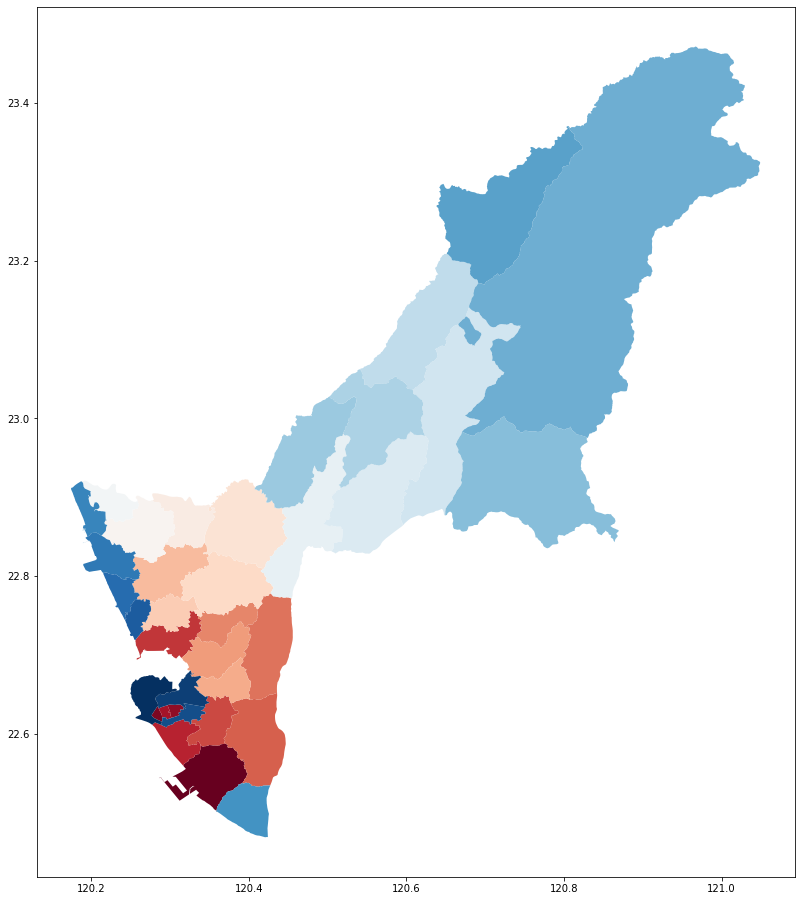

In [19]:
town_shp[town_shp['COUNTYNAME'] == '高雄市'].head(36).plot(cmap='RdBu',)

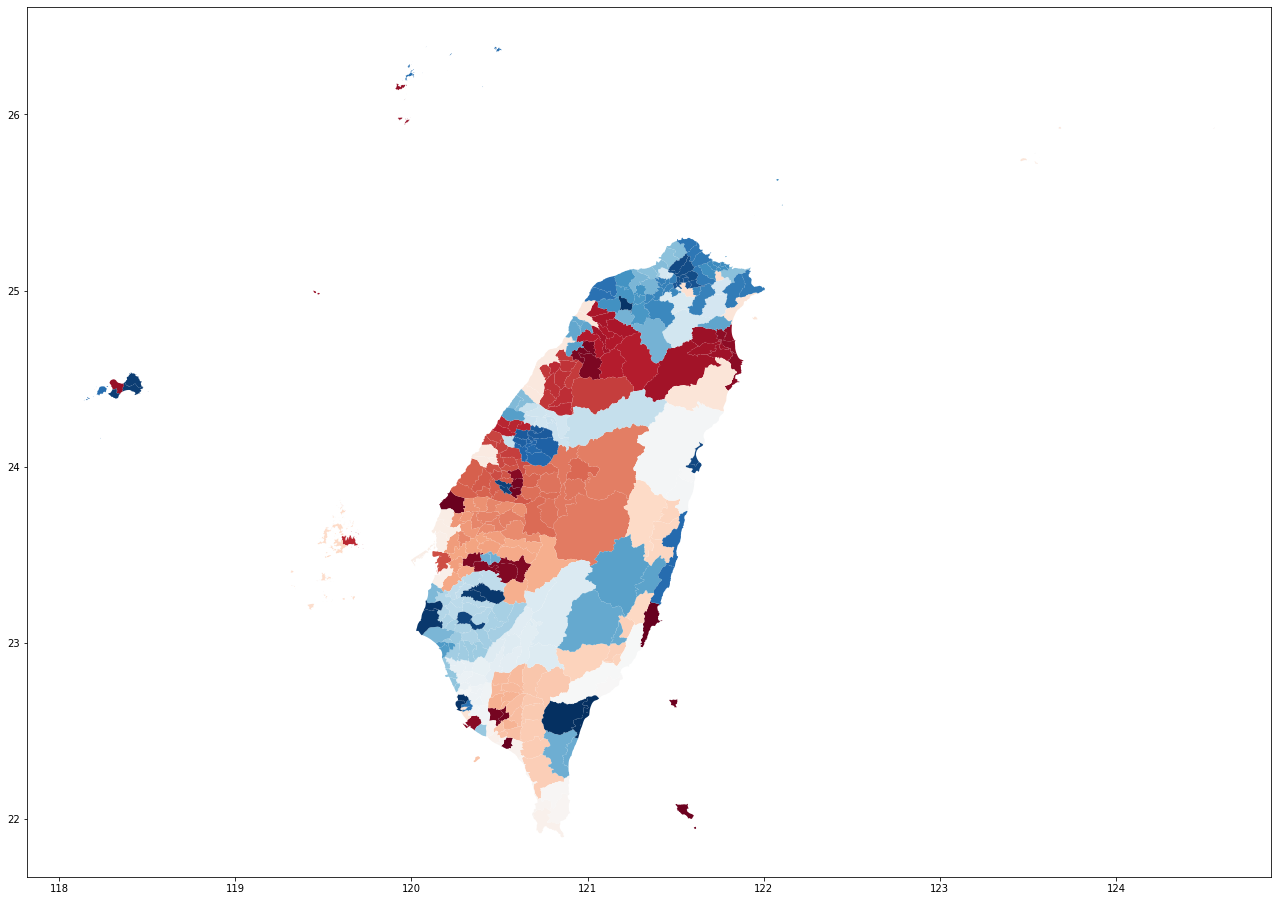

In [20]:
town_shp.plot(cmap='RdBu',)

# Feature

In [21]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 
'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r',
'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 
'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 
'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 
'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 
'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 
'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 
'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 
'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 
'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 
'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 
'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 
'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 
'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 
'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 
'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

('twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r')

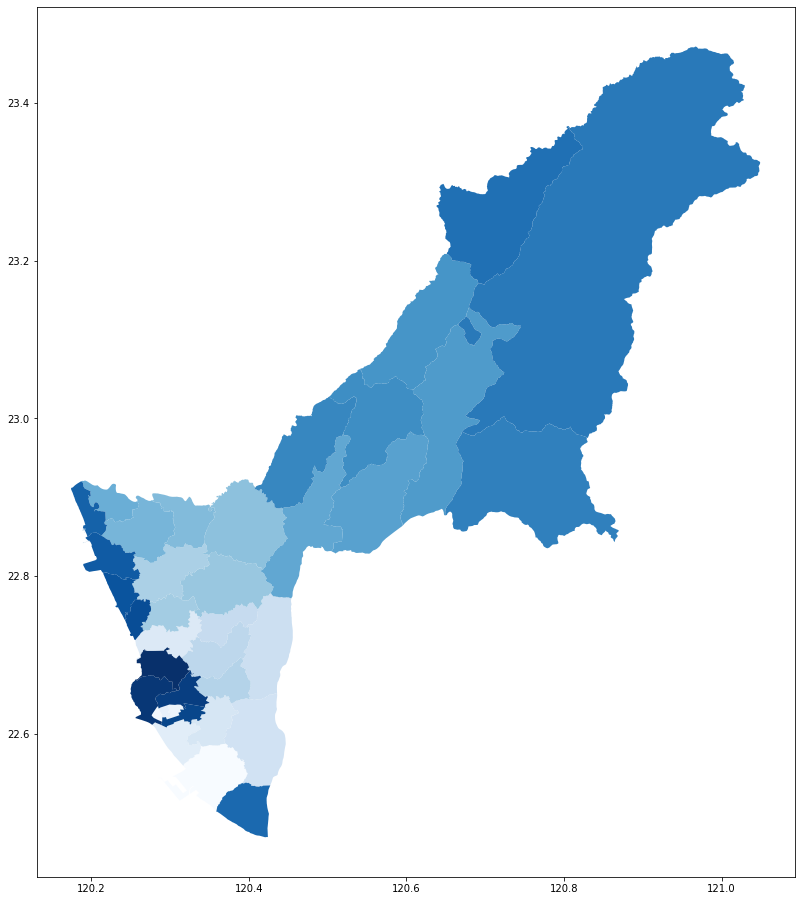

In [22]:
taichung_town_shp=town_shp[town_shp['COUNTYNAME']=='高雄市']
taichung_town_shp.plot(cmap='Blues')
matplotlib.pyplot.savefig('./wqqw.png')